# Домашнее задание 4 | Линейная регрессия

### Данные:

Вам предлагается использовать в качестве датасета информацию о характеристиках бриллиантов.

(Данные в файле diamonds.csv)

Датасет содержит следующие атрибуты:

* price: цена бриллианта в долларах США
* carat: вес бриллианта в каратах 
* cut: разновидность огранки (Fair, Good, Very Good, Premium, Ideal)
* color: цвет бриллианта (J (хуже всего), I, H, G, F, E, D (лучше всего))
* clarity: показатель "чистоты" бриллианта (I1 (хуже всего), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучше всего))
* x: длина в мм
* y: ширина в мм
* z: глубина в мм
* depth: соотношение глубины и размера площадки бриллианта в сравнении с диаметром бриллианта, выраженное в процентах
* table: отношение ширины бриллианта в верхней точке к самой широкой точке

Будем решать **задачу прогнозирования цены бриллианта (price)**, основываясь на остальных приведенных в датасете характеристиках.

Прежде чем строить какие-либо модели, нам необходимо убедиться в качестве данных. Выбросы могут кардинально менять коэффициенты модели, ухудшая её качество и искажая результаты.

## Задание 1 (2 балла): загрузка данных и удаление выбросов

- загрузите данные (файл diamonds.csv)
- постройте график "ящик с усами" (boxplot) для переменных depth, x, y, z, carat. Есть ли выбросы?
- удалите из датафрейма строки, в которых содержатся выбросы по этим переменным (используйте критерий с межквартильным размахом)
- проверьте получившийся датафрейм на пропущенные значения. Если в каком-то из столбцов есть пропущенное значение, удалите эти строки

In [1]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [176]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder

In [177]:
data = pd.read_csv('diamonds (1).csv')

In [178]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:xlabel='depth'>

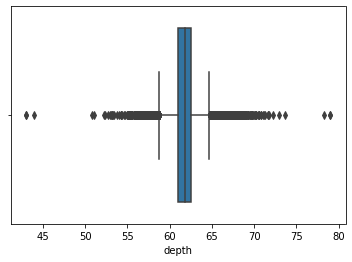

In [179]:
# Ящик с усами для переменной depth
sns.boxplot(x=data['depth'])

In [180]:
q1 = np.percentile(data['depth'], 25)
q3 = np.percentile(data['depth'], 75)
iqr = q3-q1
b = q1 - 1.5*iqr
u = q3 + 1.5*iqr
data[(data['depth'] >= u)|(data['depth'] <= b)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
24,25,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59
35,36,0.23,Good,F,VS1,58.2,59.0,402,4.06,4.08,2.37
42,43,0.26,Good,D,VS2,65.2,56.0,403,3.99,4.02,2.61
...,...,...,...,...,...,...,...,...,...,...,...
53882,53883,0.71,Fair,D,VS1,65.4,59.0,2747,5.62,5.58,3.66
53886,53887,0.70,Good,D,VS2,58.0,62.0,2749,5.78,5.87,3.38
53890,53891,0.73,Good,E,SI1,57.9,55.0,2749,6.00,5.96,3.46
53895,53896,0.70,Good,F,VS1,57.8,61.0,2751,5.83,5.79,3.36


**По переменной depth есть 2545 выбросов, они примерно одинаково являются как эстремально высокими, так и экстремально низкими (видно на графике)**

<AxesSubplot:xlabel='x'>

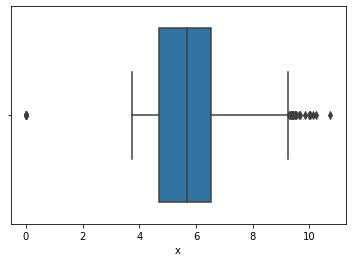

In [181]:
# Ящик с усами для переменной x
sns.boxplot(x=data['x'])

In [182]:
q1 = np.percentile(data['x'], 25)
q3 = np.percentile(data['x'], 75)
iqr = q3-q1
b_1 = q1 - 1.5*iqr
u_1 = q3 + 1.5*iqr
data[(data['x'] >= u_1)|(data['x'] <= b_1)].shape

(32, 11)

**По переменной x есть 32 выброса, по графику видно, что большинство выбросов экстрмально высокие, и несколько (по графику 1) - экстремально низкий**

<AxesSubplot:xlabel='y'>

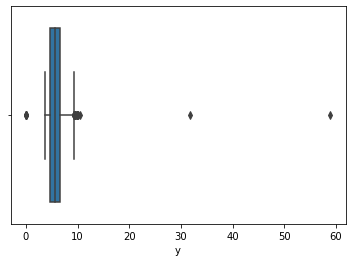

In [183]:
# Ящик с усами для переменной y
sns.boxplot(x=data['y'])

In [184]:
q1 = np.percentile(data['y'], 25)
q3 = np.percentile(data['y'], 75)
iqr = q3-q1
b_2 = q1 - 1.5*iqr
u_2 = q3 + 1.5*iqr
data[(data['y'] >= u_2)|(data['y'] <= b_2)].shape

(29, 11)

**По переменной y есть 29 выброса, по графику видно, что выбросов действительно не так много, они чаще всего экстремально высокие, уплотненные до значения примерно 15, а дальше стоят на значении 30 и 60**

<AxesSubplot:xlabel='z'>

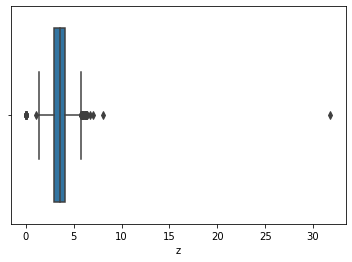

In [185]:
# Ящик с усами для переменной z
sns.boxplot(x=data['z'])

In [186]:
q1 = np.percentile(data['z'], 25)
q3 = np.percentile(data['z'], 75)
iqr = q3-q1
b_3 = q1 - 1.5*iqr
u_3 = q3 + 1.5*iqr
data[(data['z'] >= u_3)|(data['z'] <= b_3)].shape

(49, 11)

**По переменной y есть 49 выброса, по графику видно, что выбросов действительно не так много, они чаще всего экстремально высокие  уплотненные до значения примерно 8-9, а дальше стоят на значении 30**

<AxesSubplot:xlabel='carat'>

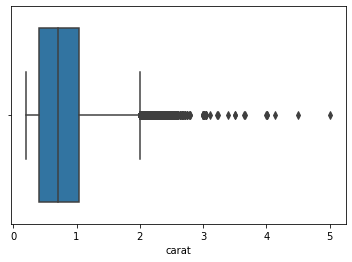

In [187]:
# Ящик с усами для переменной carat
sns.boxplot(x=data['carat'])

In [188]:
q1 = np.percentile(data['carat'], 25)
q3 = np.percentile(data['carat'], 75)
iqr = q3-q1
b_4 = q1 - 1.5*iqr
u_4 = q3 + 1.5*iqr
data[(data['carat'] >= u_4)|(data['carat'] <= b_4)].shape

(2154, 11)

**По переменной y есть 2154 выброса, по графику видно, что выбросов довольно таки много за верхней границей, за нижней их нет. Графики уплотнены в промежутке от 2 до 3, затем с редкой частотой достигают значения 5**

In [189]:
# удаление выбросов по переменным
data = data[((data['carat'] <= u_4)&(data['carat'] >= b_4)) & 
        ((data['z'] <= u_3)&(data['z'] >= b_3)) &
        ((data['y'] <= u_2)&(data['y'] >= b_2)) &
        ((data['x'] <= u_1)&(data['x'] >= b_1)) & 
        ((data['depth'] <= u)&(data['depth'] >= b))]

In [190]:
# Пропущенных значений нет
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Если вы всё сделали верно, в вашем датафрейме должно было остаться около 49666 объектов. Удостоверьтесь в этом, используя атрибут `.shape`

In [191]:
data.shape

(49666, 11)

## Задание 2 (2 балла): исследуем предпосылки к применению линейной модели

Как известно, перед построением линейной модели мы хотим знать, есть ли к этому предпосылки в наших данных. Более конкретно, мы хотим проверить два свойства: 
- отсутствие мультиколлинеарности (зависимые переменные коррелируют с прогнозируемой, но не между собой)
- линейная зависимость прогнозируемой переменной от регрессоров (в нашем случае — переменной price от depth, x, y, z)

Постройте тепловую карту и парные графики рассеяния для переменных price, depth, x, y, z (подсказка: используйте `sns.heatmap` и `sns.pairplot`). Проанализируйте полученные графики:
- есть ли линейная связь между ценой и какими-либо регрессорами? 
- есть ли мультиколлинеарность между регрессорами?

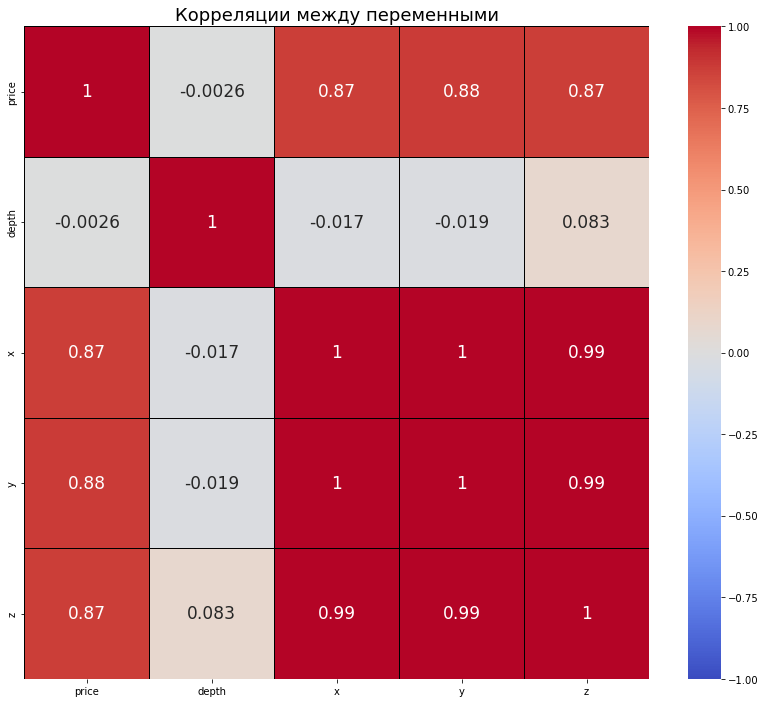

In [96]:
numeric_data = data[['price', 'depth', 'x', 'y', 'z']].corr()
fig, ax = plt.subplots(figsize=[14,12])
ax.set_title('Корреляции между переменными', fontsize=18)
sns.heatmap(numeric_data, annot = True, linecolor = 'black', linewidth = 0.75, annot_kws = {'size': 17}, cmap= 'coolwarm', vmin=-1, vmax = 1)
plt.show()

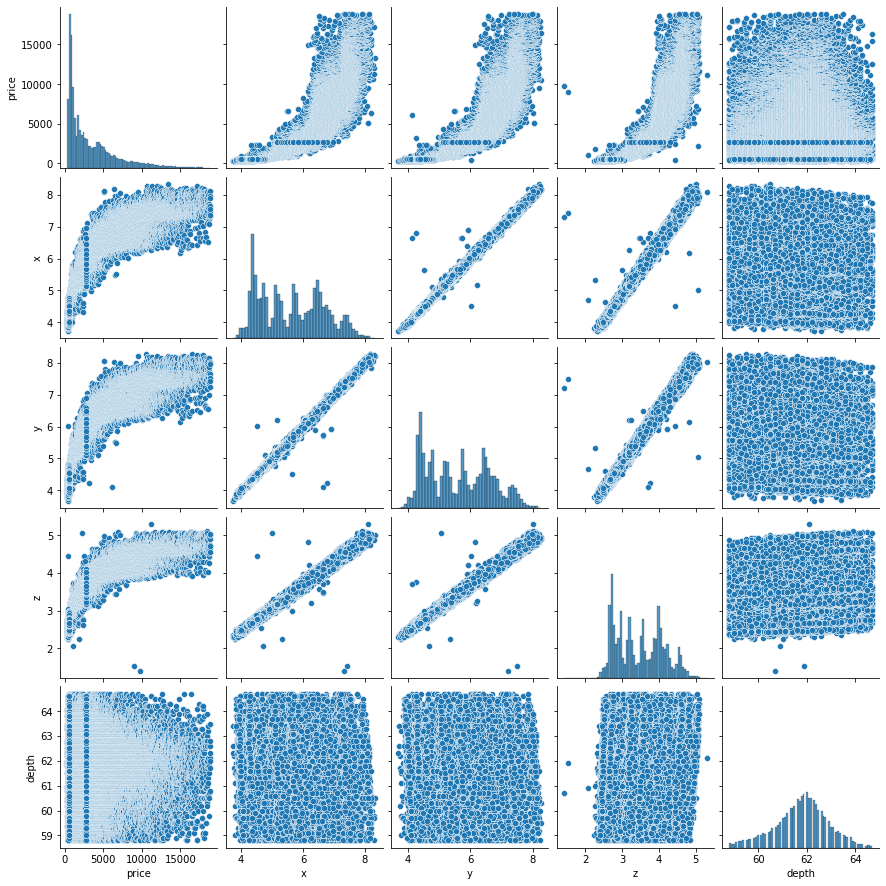

In [80]:
sns.pairplot(data[['price', 'x', 'y', 'z', 'depth']])

**С переменной price сильнее всего коррелируют переменные x, y, z. Их корреляции выше 0.8, связь сильная.Меньще всего price коррелирует с переменной depth: связь отрицательная и ее практически нет(коэффициент равен -0.0026, и на графике отсутствует даже прообраз линейной зависимости). При этом регрессоры коррелируют и между собой: корреляции между x и y, z и y, x и z приближены к 1 (показывает тепловая карта и на графике парной регрессии видим четкую линейную связь). Лишь с переменной depth у регрессов очень слабая связь.**

**Существует линейная зависимость прогнозируемой переменной от регрессоров x,y,z и мультиколлинеарность между этими регрессорами. Для первой модели возьмем переменную y, так как при  мультиколлинеарности нужно выбрать всего одну переменную, а также этот регрессор имеет наибольший коэффициент корреляции с прогнозируемой переменной**

## Задание 3 (2 балла): одномерная линейная регрессия 

Используя графики выше, выберите один регрессор, который, как вам кажется, наиболее хорошо кореллирует с целевой переменной, и постройте (обучите) модель линейной регрессии для прогнозирования цены бриллианта по этому регрессору. 

Вы можете использовать любую угодную Вам библиотеку

In [208]:
# регрессором будет переменная y
X = data['y']
# прогнозируемая переменная price
Y = data['price']

In [209]:
# подгоняем модель с помощью переменной statsmodels.api
X = sm.add_constant(X)
regr = sm.OLS(Y, X).fit()

/Users/mcndrw/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [210]:
# выводим все важные значения/метрики в модели
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 1.634e+05
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:26:34   Log-Likelihood:            -4.3855e+05
No. Observations:               49666   AIC:                         8.771e+05
Df Residuals:                   49664   BIC:                         8.771e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.301e+04     41.537   -313.097      0.000   -1.31e+04   -1.29e+04
y           2938.1227      7.269    404.204      0.000    2923.876    2952.370
==============================================================================
Omnibus:                    18113.622   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90616.440
Skew:                           1.705   Prob(JB):                         0.00
Kurtosis:                       8.671   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**По данной информации видно, что в уравнении константа равна -1.301e+04, а коэффициент при регрессоре - 2938.1227.**

**Уравнение принимает следующий вид:**
    
**Y = 2938.1227X-1.301e+04**

Проинтерпретируйте полученный коэффициент. Например: при изменении данного регрессора на Х целевая переменная изменится на Y

**С увеличением регрессора увеличится и прогнозируемая переменная на значение коэффициента, который является довольно большим положительным числом**

Предположим, у нас есть некоторый бриллиант со следующими характеристиками: 

- carat = 0.90
- depth = 62.7
- table = 60
- x = 6.12
- y = 6.07
- z = 3.82

Какую цену на данный бриллиант можно спрогнозировать, используя полученную модель? 

In [211]:
Y = 2938.1227*6.07-1.301e+04
print(f'Цена бриллианта при ширине 6.07 мм равна: {Y}')

Цена бриллианта при ширине 6.07 мм равна: 4824.404789


## Задание 4 (2 балла): оценка качества модели

Теперь оценим качество получившейся модели на нашем датасете.

- посчитайте коэффициент $R^2$. Каким образом его можно проинтерпретировать? Что можно сказать о качестве получившегося прогноза?
- Выберите еще одну метрику для оценки качества модели регрессии и посчитайте её (например, MSE, MAE, RMSE, MAPE)

**По полученной информации выше видно, что 𝑅2 равен 0.767. Но я расчитаю этот коэффициент иным способом, используя библиотеку sklearn.linear_model, чтобы удостовериться в правильности**

In [212]:
x = np.array(data['y']).reshape(-1,1)
y = np.array(data['price']).reshape(-1,1)
model = LinearRegression()
model = model.fit(x,y)
print(f'Коэффициент 𝑅2 равен {round(model.score(x, y), 3)}')

Коэффициент 𝑅2 равен 0.767


**Получается, что количества отклонений в прогнозе,объясненных набором данных, равно 0.767. 76,7% вариаций цены бриллианта можно объяснить шириной бриллианта в мм. Чем ближе R2 к 1, тем идеальнее модель. Качество моей модели неплохое.**

In [213]:
# спрогнозируем значения цены бриллианта
predict = model.predict(x)

In [214]:
# рассчитаем среднеквадратичную ошибку по формуле с сайта: https://www.codecamp.ru/blog/mean-squared-error-python/
MSE = np.square(np.subtract(y,predict)).mean()
print(f'Cреднеквадратичная ошибка равна {round(MSE, 3)}')

Cреднеквадратичная ошибка равна 2736258.044


## Задание 5 (2 балла): множественная линейная регрессия 

- Постройте новую модель, на этот раз в качестве регрессоров используйте все переменные из задания №2. 
- Посчитайте качество нашей модели (коэффициент детерминации $R^2$). Как изменилось качество? Стала ли новая модель лучше или хуже? 
- Взгляните на получившиеся коэффициенты. Как поменялся коэффициент при регрессоре из задания №3? 
- Сделайте новой моделью прогноз стоимости для бриллианта из задания №3. Как поменялся прогноз? 

In [202]:
# прогнозируемая переменная 
y = data['price']
# определяем регрессоров
x = data[['y', 'x', 'z', 'depth']]
x = sm.add_constant(x)
reqr_1 = sm.OLS(y, x).fit()

In [203]:
reqr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 4.089e+04
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:16:18   Log-Likelihood:            -4.3853e+05
No. Observations:               49666   AIC:                         8.771e+05
Df Residuals:                   49661   BIC:                         8.771e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.58e+04   1072.779    -14.731      0.000   -1.79e+04   -1.37e+04
y           3290.3925    163.157     20.167      0.000    2970.602    3610.183
x           -321.8017    162.499     -1.980      0.048    -640.301      -3.302
z            -45.5496    277.889     -0.164      0.870    -590.216     499.117
depth         45.0482     17.355      2.596      0.009      11.032      79.064
==============================================================================
Omnibus:                    18161.194   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90903.489
Skew:                           1.710   Prob(JB):                         0.00
Kurtosis:                       8.678   Cond. No.                     9.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Коэффициент R2 не изменился, он равен 0.767, получается, что качество модели так же не изменилась. Константа в новой модели стала меньше -1.58e+04, а коэффициент при предыдущем единственном регрессоре (y) стало больше (раньше 2938.1227, теперь 3290.3925). При этом интересно, что коэффициенты при x и z отрицательные, получается, с их изменением прогнозируемая переменная будет меньше.**

**Уравнение принимает следующий вид:**
    
**Y = 3290.3925y - 321.8017x - 45.5496z + 45.0482depth - 1.58e+04**

In [216]:
# Рассчитаем цену бриллианта по метрикам из задания 3 по новой модели 
Y = 3290.3925 * 6.07 - 321.8017 * 6.12 - 45.5496 * 3.82 + 45.0482 * 62.7 - 1.58e+04
print(f'Цена бриллианта по новой модели равна: {Y}')

Цена бриллианта по новой модели равна: 4853.778739000005


**Прогнозируемая цена бриллианта по новой модели стала больше. Предполагаю, что это произошло из-за новых регрессоров, которые так или иначе влияют на Y**

## Задание 6 (2 балла): категориальные переменные

До этого мы намеренно выбрали из нашего датафрейма только числовые переменные. На практике часто какая-либо информация содержится в категориальных переменных, и их, разумеется, тоже хочется учитывать, когда мы делаем прогноз. 

Самостоятельно изучите один из способов кодирования категориальных переменных. Например, One-Hot Encoding, Mean Target Encoding, Ordinal Encoding (применим ли этот способ в данном случае? Взгляните на описание категориальных переменных). 

Реализуйте этот способ и обучите новую модель, на этот раз добавив туда ещё и закодированные категориальные переменные. 

- как изменилось качество модели? 
- какой вклад вносят категориальные переменные? Проинтерпретируйте коэффициенты при них

**Я выбрала Ordinal Encoding, так как категориальные переменные в датасете являются порядковыми переменными**

In [226]:
df_copy = data.copy()

In [ ]:
# кодируем каждое значение переменных, расставив их по порядку
cutcoder = OrdinalEncoder(categories = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
colorcoder = OrdinalEncoder(categories = [['J', 'I', 'H', 'G', 'F', 'E', 'D']])
claritycoder = OrdinalEncoder(categories = [['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
# добавляем закодированные значения в таблицу 
df_copy.loc[:, 'cut'] = cutcoder.fit_transform(df_copy.loc[:,'cut'].to_frame())
df_copy.loc[:, 'color'] = colorcoder.fit_transform(df_copy.loc[:, 'color'].to_frame())
df_copy.loc[:, 'clarity'] = claritycoder.fit_transform(df_copy.loc[:, 'clarity'].to_frame())

In [229]:
# кодировка прошла успешно
df_copy

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
3,4,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,2.0,0.0,5.0,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,4.0,6.0,2.0,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,1.0,6.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,2.0,6.0,2.0,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,3.0,2.0,1.0,61.0,58.0,2757,6.15,6.12,3.74


In [234]:
y = df_copy['price']
x = df_copy[['y', 'x', 'z', 'depth', 'cut', 'clarity', 'color']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

/Users/mcndrw/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [235]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 3.555e+04
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:53:34   Log-Likelihood:            -4.3017e+05
No. Observations:               49666   AIC:                         8.604e+05
Df Residuals:                   49658   BIC:                         8.604e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.752e+04    916.802    -30.022      0.000   -2.93e+04   -2.57e+04
y           2115.5804    138.632     15.260      0.000    1843.860    2387.300
x           1428.4623    138.328     10.327      0.000    1157.338    1699.586
z           -357.1258    234.868     -1.521      0.128    -817.471     103.219
depth        154.0665     14.759     10.439      0.000     125.139     182.994
cut           74.0580      6.401     11.569      0.000      61.511      86.605
clarity      532.8226      4.170    127.778      0.000     524.650     540.996
color        273.1709      3.876     70.483      0.000     265.574     280.767
==============================================================================
Omnibus:                    16470.145   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65726.139
Skew:                           1.616   Prob(JB):                         0.00
Kurtosis:                       7.617   Cond. No.                     9.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Благодаря категориальным переменным модель стала качественнее, R2 стал равен 0.834. При этом все коэффициенты при регрессорах (и количественных, и закодированных категориальных) стали положительные (кроме z - это глубина), получается с увеличением этих регрессоров, увеличивается и прогнозируемая переменная.**